## Genetic Algorithm Excercise

### Problem

In this case the problem addressed was the pub problem where there are 20 people that are invited to a birthday celebration but there are some of them that dislike each other. Therefore, is necessary to split the group and minimize the potential arguments between them. 

### Method

Microbial genetic algorithm.

In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(32)

# Define the number of variables
num_variables = 20

# Generate a random binary matrix with values 1 and -1
data = np.random.choice([-1, 1], size=(num_variables, num_variables))

# Make the matrix symmetric by copying the upper triangle to the lower triangle
correlation_matrix = np.triu(data, k=1) + np.triu(data, k=1).T

# Set the diagonal elements to 0
np.fill_diagonal(correlation_matrix, 0)

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
[[ 0  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1]
 [ 1  0  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1]
 [ 1  1  0  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1]
 [-1 -1  1  0 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1]
 [-1 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1]
 [-1 -1  1  1 -1  0  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1  1  0  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1]
 [ 1 -1  1  1 -1 -1  1  0 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1 -1 -1  0  1  1 -1  1  1 -1  1  1 -1 -1  1]
 [ 1 -1 -1  1  1  1  1  1  1  0 -1 -1  1  1  1 -1 -1 -1  1  1]
 [-1 -1 -1  1 -1  1  1 -1  1 -1  0 -1  1 -1 -1 -1  1  1 -1  1]
 [ 1  1 -1  1 -1 -1  1 -1 -1 -1 -1  0 -1 -1  1  1  1  1 -1  1]
 [ 1  1 -1 -1  1  1 -1 -1  1  1  1 -1  0 -1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  0  1 -1  1 -1  1  1]
 [-1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1  0  1 -1  1 -1  1]
 [ 1  1 -1  1 -1 -1 -1 -1  1 -1 -1 

Population:
[[ 1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1]
 [-1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1]
 [-1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1]
 [-1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1]
 [-1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1]
 [-1  1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1]
 [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1]
 [-1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1]
 [-1 -1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1]
 [-1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1]
 [-1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1]]
fitness
[ 12.  -4.   4.   4.  -8.  28.  28

Text(0.5, 1.0, 'Microbial GA')

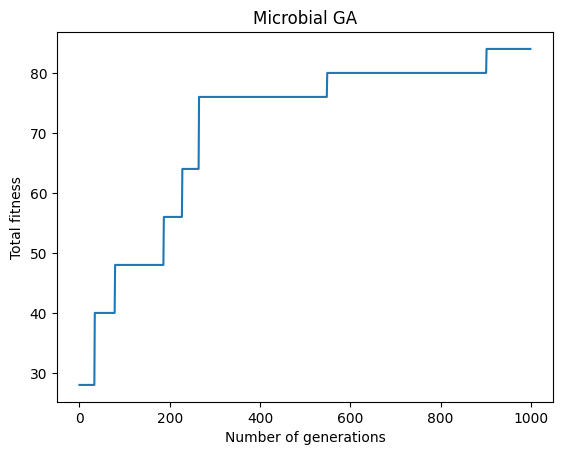

In [3]:
##Import utilities
import random
import numpy as np
import matplotlib.pyplot as plt

# setup variables
pop_size = 15                    ## People that go to the party
n_genes = 20                     ## Population size
n_generations = 1000

## Correlation matrix
matrix = correlation_matrix

# initial population
np.random.seed(35)
population = np.random.choice([-1, 1], size=(pop_size, n_genes))

# fitness function
fitness = np.zeros(n_genes)
total_fitness = []

print("Population:")
print(population)

##Calculating the fitness for the initial population
for pop in range(len(population)):

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            fitness[pop] += matrix[i][j] * population[pop, i] * population[pop, j]

print("fitness")
print(fitness)

for gen in range(n_generations):

    ##Get a random individual, here get the index to then look for the fitness of that individual
    rand_p1 = np.random.choice(range(14))
    rand_p2 = np.random.choice(range(14))

    ##Check that we are not using the same individual
    if rand_p1 == rand_p2:
        while rand_p1 == rand_p2:
            rand_p1 = np.random.choice(range(14))
            rand_p2 = np.random.choice(range(14))

    ##Get the fitness for the two random individuals
    p1 = fitness[rand_p1]
    p2 = fitness[rand_p2]

    ##Tournament selection
    if (p1 > p2):
        ##This is the winner index in fitness vector
        winner = rand_p1
        loser = rand_p2
    else:
        winner = rand_p2
        loser = rand_p1

    ##Microbial GA
    #Crossover probability
    pc = 0.1
    #Mutation probability
    pm = 0.1
    # print(max(fitness))
    ##Mutation and Crossover - Microbial GA
    for i in range(pop_size):
        ##Crossover
        if (random.random() < pc):
            ##Replace the loser genes to the winner genes
            population[loser][i] = population[winner][i]
        ##Mutation
        elif (random.random() < pm): 
            ##Flip the loser genes from 1 to -1 or -1 to 1
            population[loser][i] = population[loser][i] * -1

        # ##Mutation - Uncomment to test the algorithm just with mutation
        # if (random.random() < pm): 
        #     ##Flip the loser genes from 1 to -1 or -1 to 1
        #     population[loser][i] = population[loser][i] * -1
    
    #Update loser fitness in the population
    fitness[loser] = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            fitness[loser] += matrix[i][j] * population[loser, i] * population[loser, j]
            
    ##My optimal actual fitness
    optimal = max(fitness)

    ##Store the fintness through generations and compare with diferent probabilities to crossover and mutation(pc and pm)
    total_fitness.append(optimal)

plt.plot(total_fitness)
plt.xlabel("Number of generations")
plt.ylabel("Total fitness")
plt.title("Microbial GA")


In [105]:
"""
This cell was used to test different probabilities for crossover and mutation,
and store all the information in a dictionary to plot and compare
"""

##Import utilities
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setup variables
pop_size = 5                   ## People that go to the party
n_genes = 20                   ## Population size
n_generations = 1000

## Correlation matrix
matrix = correlation_matrix

# initial population
np.random.seed(35)
population = np.random.choice([-1, 1], size=(pop_size, n_genes))

# fitness function
fitness = np.zeros(n_genes)
total_fitness = []

# print("Population:")
# print(population)

##Calculating the fitness for the initial population
for pop in range(len(population)):

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            fitness[pop] += matrix[i][j] * population[pop, i] * population[pop, j]

# print("fitness")
# print(fitness)

## Range to apply different values for pc and pm
my_pc_pm_range = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

pc_pm_dict = {}

for pm in my_pc_pm_range:
    
    for gen in range(n_generations):

        ##Get a random individual, here get the index to then look for the fitness of that individual
        rand_p1 = np.random.choice(range(pop_size - 1))
        rand_p2 = np.random.choice(range(pop_size - 1))

        ##Check that we are not using the same individual
        if rand_p1 == rand_p2:
            while rand_p1 == rand_p2:
                rand_p1 = np.random.choice(range(pop_size - 1))
                rand_p2 = np.random.choice(range(pop_size - 1))

        ##Get the fitness for the two random individuals
        p1 = fitness[rand_p1]
        p2 = fitness[rand_p2]

        ##Tournament selection
        if (p1 > p2):
            ##This is the winner index in fitness vector
            winner = rand_p1
            loser = rand_p2
        else:
            winner = rand_p2
            loser = rand_p1

        ##Microbial GA
        #Crossover probability
        pc = 0.1
        #Mutation probability
        # pm = 0.1

        ##Mutation and Crossover - Microbial GA
        for i in range(pop_size):
            ##Crossover
            if (random.random() < pc):
                ##Replace the loser genes to the winner genes
                population[loser][i] = population[winner][i]
            ##Mutation
            elif (random.random() < pm): 
                ##Flip the loser genes from 1 to -1 or -1 to 1
                population[loser][i] = population[loser][i] * -1

            # ##Mutation - Uncomment to test the algorithm just with mutation
            # if (random.random() < pm): 
            #     ##Flip the loser genes from 1 to -1 or -1 to 1
            #     population[loser][i] = population[loser][i] * -1
        
        #Update loser fitness in the population
        fitness[loser] = 0
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                fitness[loser] += matrix[i][j] * population[loser, i] * population[loser, j]
                
        ##My optimal actual fitness
        optimal = max(fitness)

        ##Store the fintness through generations and compare with diferent probabilities to crossover and mutation(pc and pm)
        total_fitness.append(optimal)

        ##Add the result to a dictionary
        pc_pm_dict[pm] = pc_pm_dict.get(pm, total_fitness)
    
    total_fitness = []

In [106]:
##Transform the dictionary to DataFrame
df = pd.DataFrame(pc_pm_dict)
df

,0.05,0.10,0.15,0.20,0.25,0.30
0,20.0,108.0,112.0,112.0,116.0,116.0
1,24.0,108.0,112.0,112.0,116.0,116.0
2,24.0,108.0,112.0,112.0,116.0,116.0
3,24.0,108.0,112.0,112.0,116.0,116.0
4,24.0,108.0,112.0,112.0,116.0,116.0
...,...,...,...,...,...,...
995,108.0,112.0,112.0,116.0,116.0,124.0
996,108.0,112.0,112.0,116.0,116.0,124.0
997,108.0,112.0,112.0,116.0,116.0,124.0
998,108.0,112.0,112.0,116.0,116.0,124.0


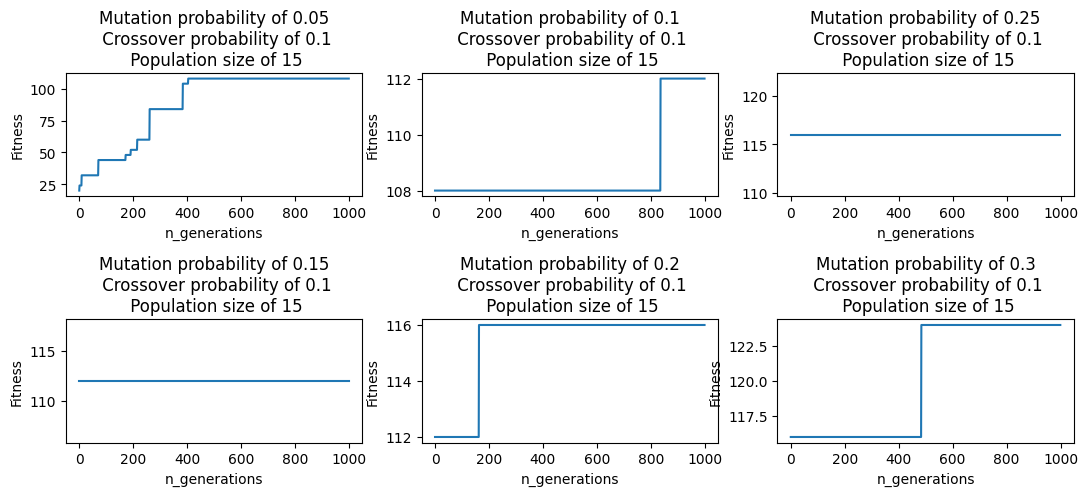

In [107]:
##Plot the tests and the performance with different probability of mutations
figure, axis = plt.subplots(2, 3) 

# For 0.05 pm subplot
axis[0, 0].plot(df[0.05]) 
axis[0, 0].set_title("Mutation probability of 0.05\n Crossover probability of 0.1\n Population size of 15")
axis[0, 0].set_xlabel("n_generations")
axis[0, 0].set_ylabel("Fitness")
  
# For 0.1 pm subplot
axis[0, 1].plot(df[0.1]) 
axis[0, 1].set_title("Mutation probability of 0.1\n Crossover probability of 0.1\n Population size of 15")
axis[0, 1].set_xlabel("n_generations")
axis[0, 1].set_ylabel("Fitness")
  
# For 0.15 pm subplot
axis[1, 0].plot(df[0.15]) 
axis[1, 0].set_title("Mutation probability of 0.15\n Crossover probability of 0.1\n Population size of 15")
axis[1, 0].set_xlabel("n_generations")
axis[1, 0].set_ylabel("Fitness")
  
# For 0.2 pm subplot 
axis[1, 1].plot(df[0.2]) 
axis[1, 1].set_title("Mutation probability of 0.2\n Crossover probability of 0.1\n Population size of 15") 
axis[1, 1].set_xlabel("n_generations")
axis[1, 1].set_ylabel("Fitness")

# For 0.25 pm subplot
axis[0, 2].plot(df[0.25]) 
axis[0, 2].set_title("Mutation probability of 0.25\n Crossover probability of 0.1\n Population size of 15") 
axis[0, 2].set_xlabel("n_generations")
axis[0, 2].set_ylabel("Fitness")

# For 0.3 pm subplot
axis[1, 2].plot(df[0.3]) 
axis[1, 2].set_title("Mutation probability of 0.3\n Crossover probability of 0.1\n Population size of 15") 
axis[1, 2].set_xlabel("n_generations")
axis[1, 2].set_ylabel("Fitness")

# Adjust the distance between subplots
plt.subplots_adjust(hspace=1, right=1.7)